<a href="https://colab.research.google.com/github/Pragadesh-45/cardiovascular_disease_classification_pred/blob/main/patient-condition-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Business Objective:**

The business objective of this project is to classify patient condition using drug review, namely Depression, High Blood Pressure, and Type 2 Diabetes. The goal is to understand the effectiveness of drugs for specific conditions and their potential side effects by analyzing patient reviews, ratings, and useful counts. The insights gained from this analysis can be used to recommend suitable drugs for patients based on their condition and the experiences of other patients with similar conditions.

**Features:**

* DrugName (categorical): The name of the drug that the patient is reviewing. This feature will be used to group reviews by drug and analyze the effectiveness of each drug for specific conditions.
* Condition (categorical): The name of the condition that the patient is reviewing the drug for. This feature will be used to identify reviews related to Depression, High Blood Pressure, and Type 2 Diabetes.
* Review (text): The patient's review of the drug. This feature will be used to extract insights on the effectiveness and potential side effects of drugs for specific conditions.
* Rating (numerical): A 10-star patient rating reflecting overall patient satisfaction with the drug. This feature will be used to understand the level of patient satisfaction with different drugs for specific conditions.
* Date (date): The date on which the review was entered. This feature will be used to analyze trends over time in patient reviews and ratings.
* UsefulCount (numerical): The number of users who found the review useful. This feature will be used to identify reviews that are likely to be helpful in understanding the effectiveness and potential side effects of drugs for specific conditions.

**Note:**

* I have taken only 3 conditions out of 884 different conditions for my analysis, which are 'Depression','High Blood Pressure' and 'Diabetes Type2'.

In [2]:
# Importing Required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
url = 'https://raw.githubusercontent.com/Pragadesh-45/cardiovascular_disease_classification_pred/main/input/drugsComTest_raw.csv'
data = pd.read_csv(url)
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [4]:
# Define the conditions to keep
keep_conditions = ["Depression", "High Blood Pressure", "Diabetes, Type 2"]

# Filter the DataFrame to only keep the records with the specified conditions
df = data[data['condition'].isin(keep_conditions)]

df.drop(['uniqueID'],axis =1,inplace=True)

df.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
35,Actos,"Diabetes, Type 2","""Have been on Actos for almost a year, gained ...",4,9-Jun-10,42
38,Escitalopram,Depression,"""I am a 22 year old female college student. I ...",9,29-Apr-14,32
67,Zoloft,Depression,"""Zoloft did not help me at all. I was on it f...",1,14-Jan-13,51
73,Effexor XR,Depression,"""Sadly only lasted 5 days on Effexor XR. The s...",1,24-Apr-16,18


In [5]:
df.shape

(4686, 6)

In [6]:
df.describe()

,rating,usefulCount
count,4686.000000,4686.000000
mean,6.921895,47.992744
std,3.190816,53.394834
min,1.000000,0.000000
25%,5.000000,16.000000
50%,8.000000,32.000000
75%,10.000000,62.000000
max,10.000000,949.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4686 entries, 0 to 53732
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugName     4686 non-null   object
 1   condition    4686 non-null   object
 2   review       4686 non-null   object
 3   rating       4686 non-null   int64 
 4   date         4686 non-null   object
 5   usefulCount  4686 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 256.3+ KB


# EDA AND DATA VISUALIZATION:

In [8]:
# Missing values
df.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Most popular drugs
# Top 20
df['drugName'].value_counts().nlargest(20)

Sertraline        204
Bupropion         198
Desvenlafaxine    159
Venlafaxine       137
Pristiq           136
Escitalopram      135
Citalopram        125
Vortioxetine      113
Viibryd           112
Duloxetine        109
Cymbalta          108
Zoloft            105
Lexapro           102
Victoza            97
Wellbutrin         92
Vilazodone         92
Liraglutide        89
Fluoxetine         89
Lisinopril         87
Celexa             78
Name: drugName, dtype: int64

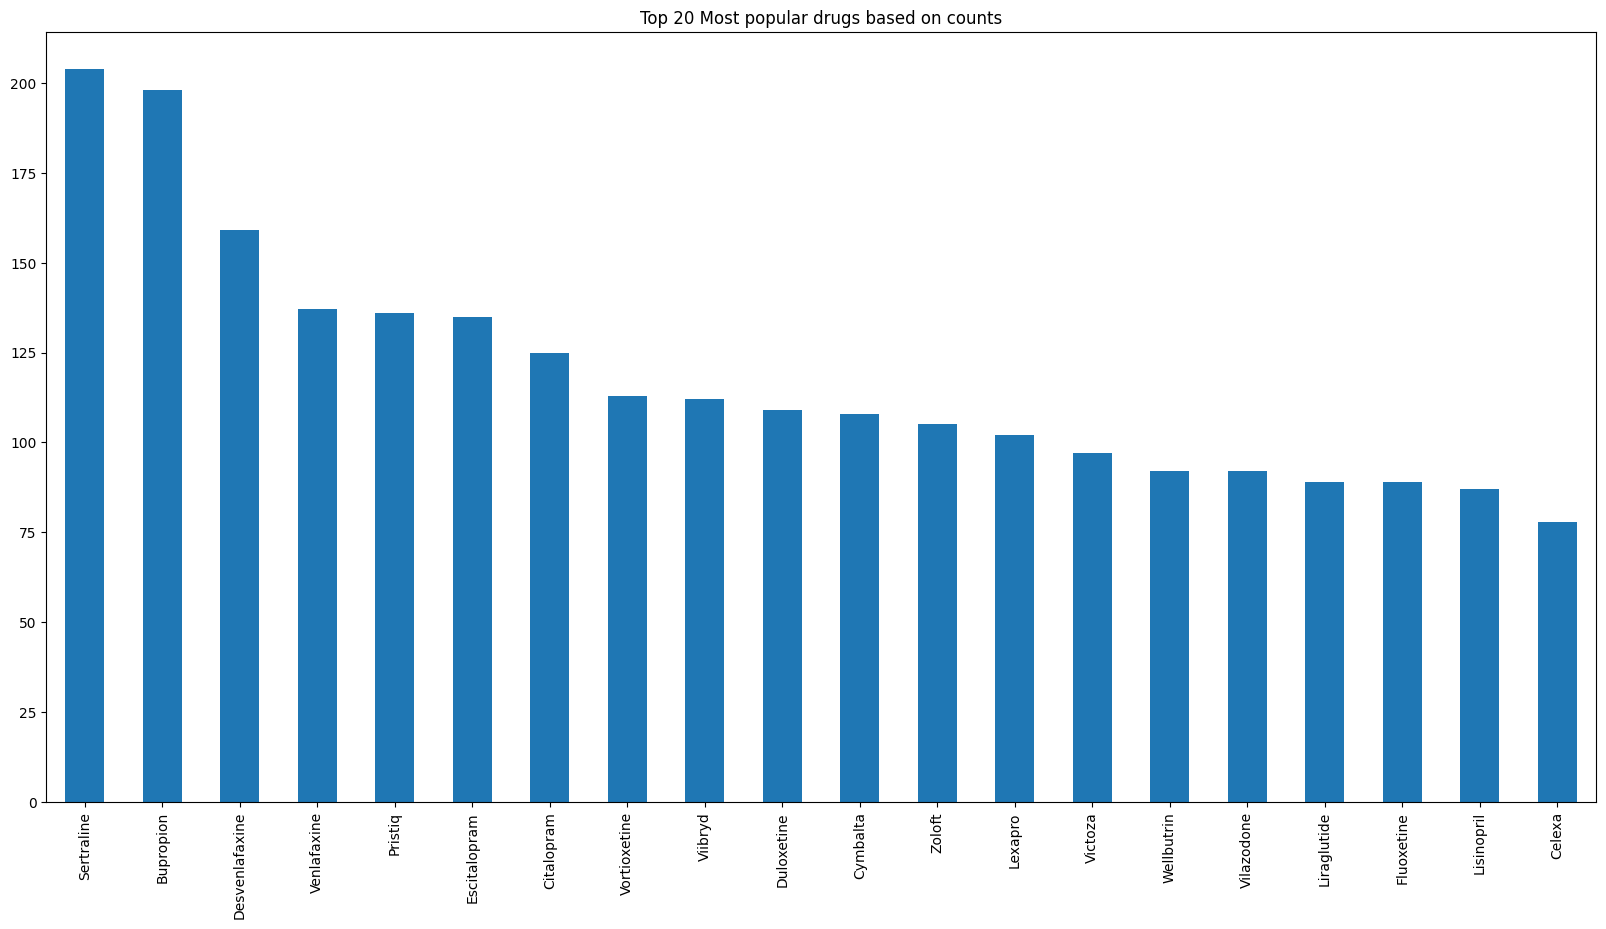

In [11]:
# Top 20 Drugs(MOst Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Most popular drugs based on counts')
plt.show()

<Figure size 1500x1000 with 0 Axes>

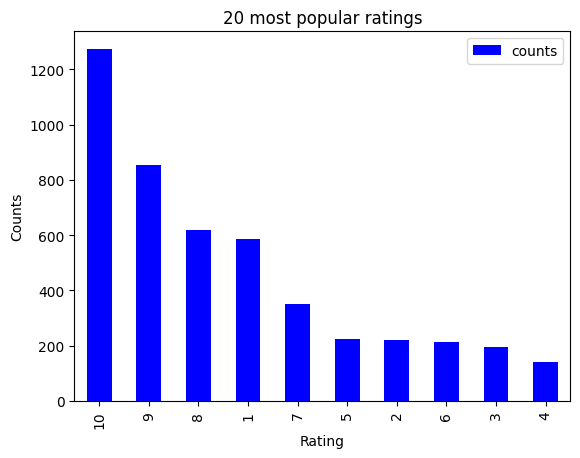

In [12]:
# Grouping the data by rating and count the frequency of each rating
rating_counts = df.groupby('rating').size().reset_index(name='counts')

# Sort the data by the frequency of each rating
rating_counts = rating_counts.sort_values(by='counts',ascending=False)

# Plot a bar chart of the 20 most popular ratings
plt.figure(figsize=(15,10))
rating_counts[:20].plot.bar(x='rating',y='counts',color='blue')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('20 most popular ratings')
plt.show()

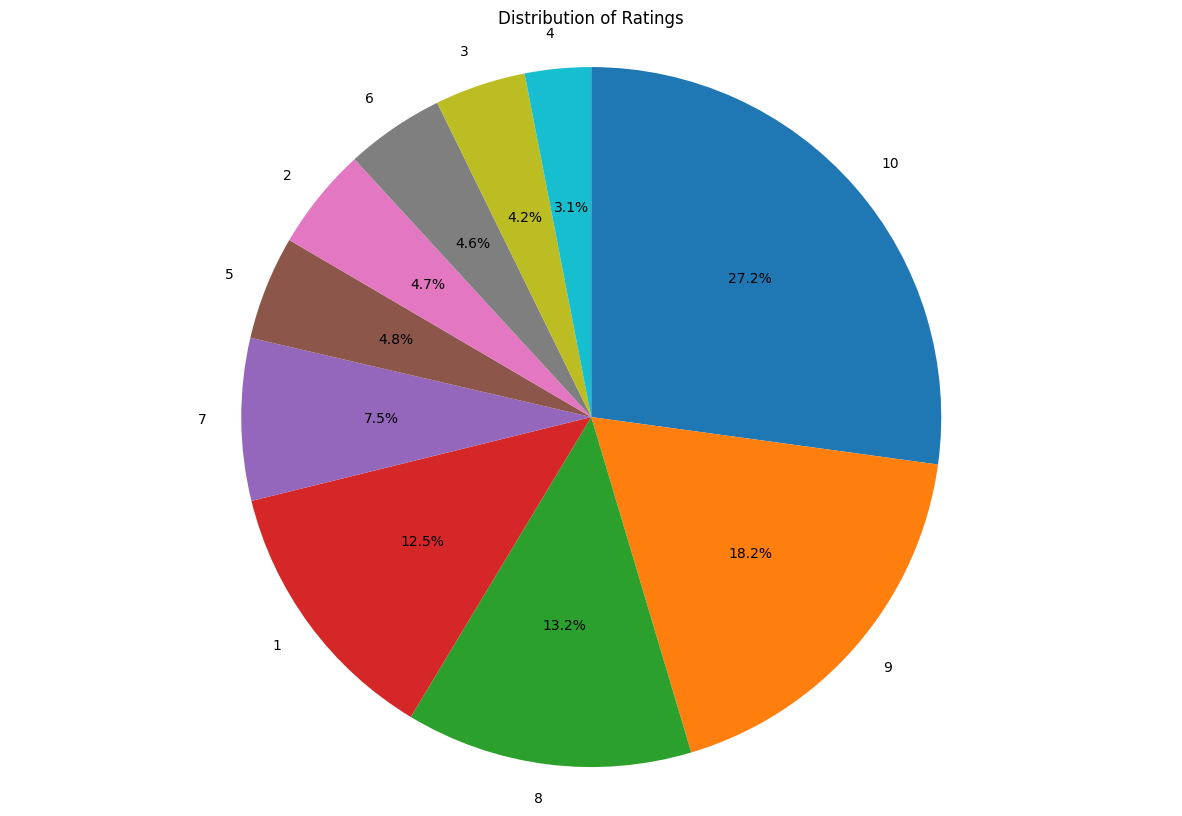

In [13]:
# Plot a pie chart of the distribution of ratings
plt.figure(figsize=(15,10))
plt.pie(rating_counts['counts'], labels=rating_counts['rating'], startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

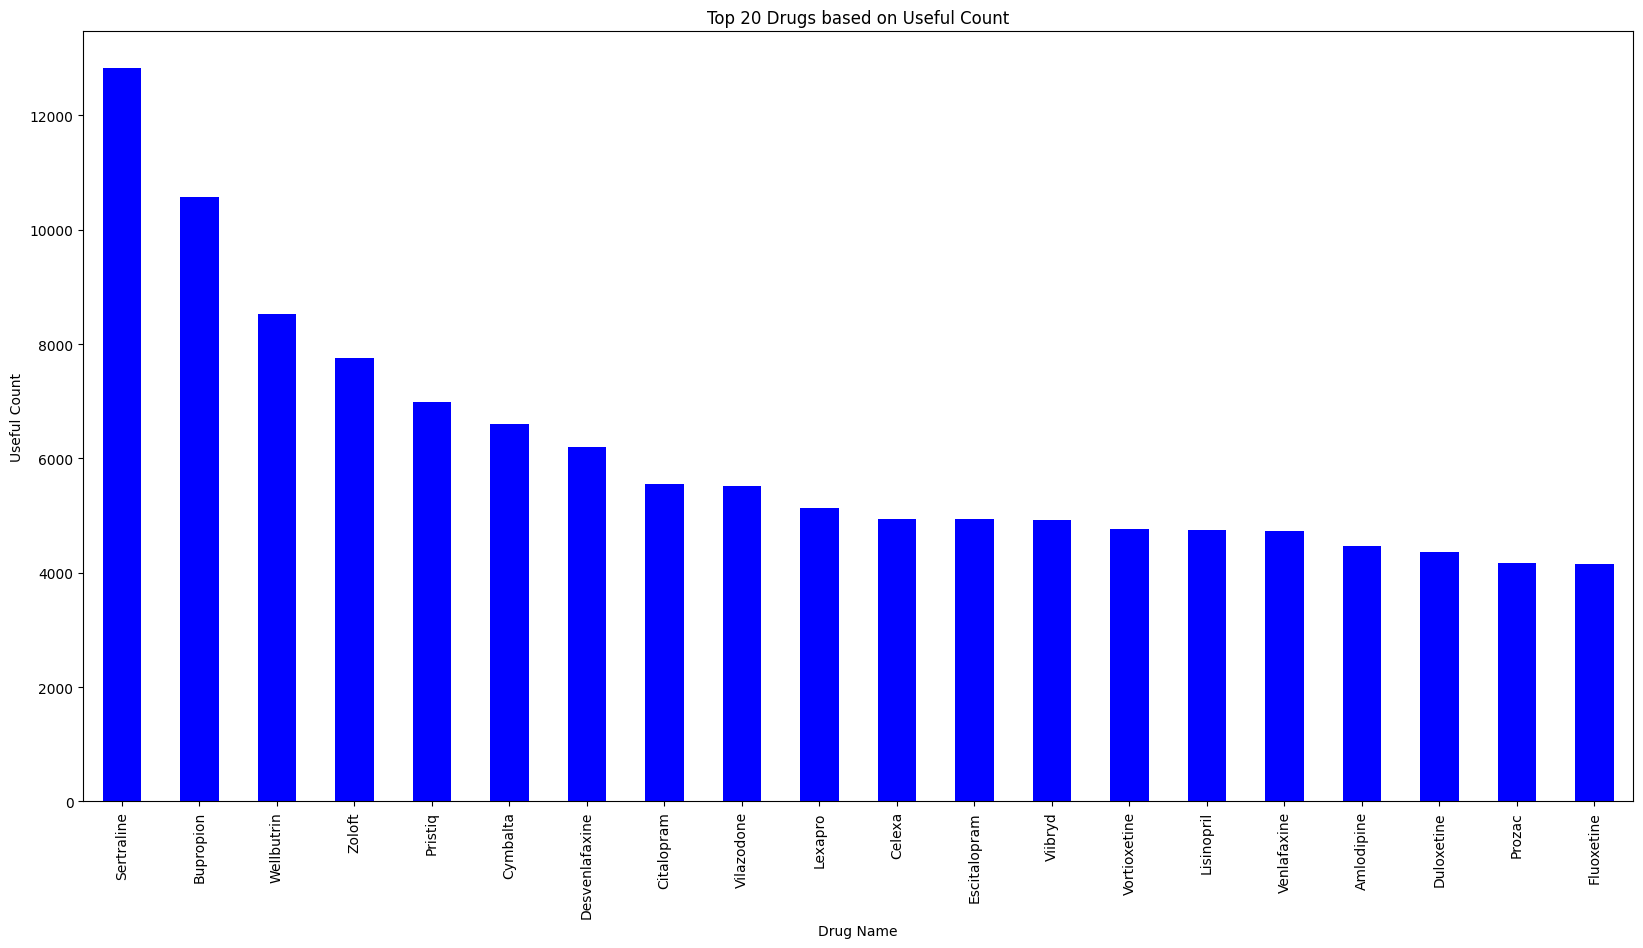

In [14]:
# Get the 20 most popular drugs based on usefulCount
plt.figure(figsize=(20,10))
top_20_drugs = df.groupby('drugName')['usefulCount'].sum().sort_values(ascending=False).head(20)

# Plot the bar plot
top_20_drugs.plot(kind='bar', color='blue')
plt.xlabel('Drug Name')
plt.ylabel('Useful Count')
plt.title('Top 20 Drugs based on Useful Count')
plt.xticks(rotation=90)
plt.show()

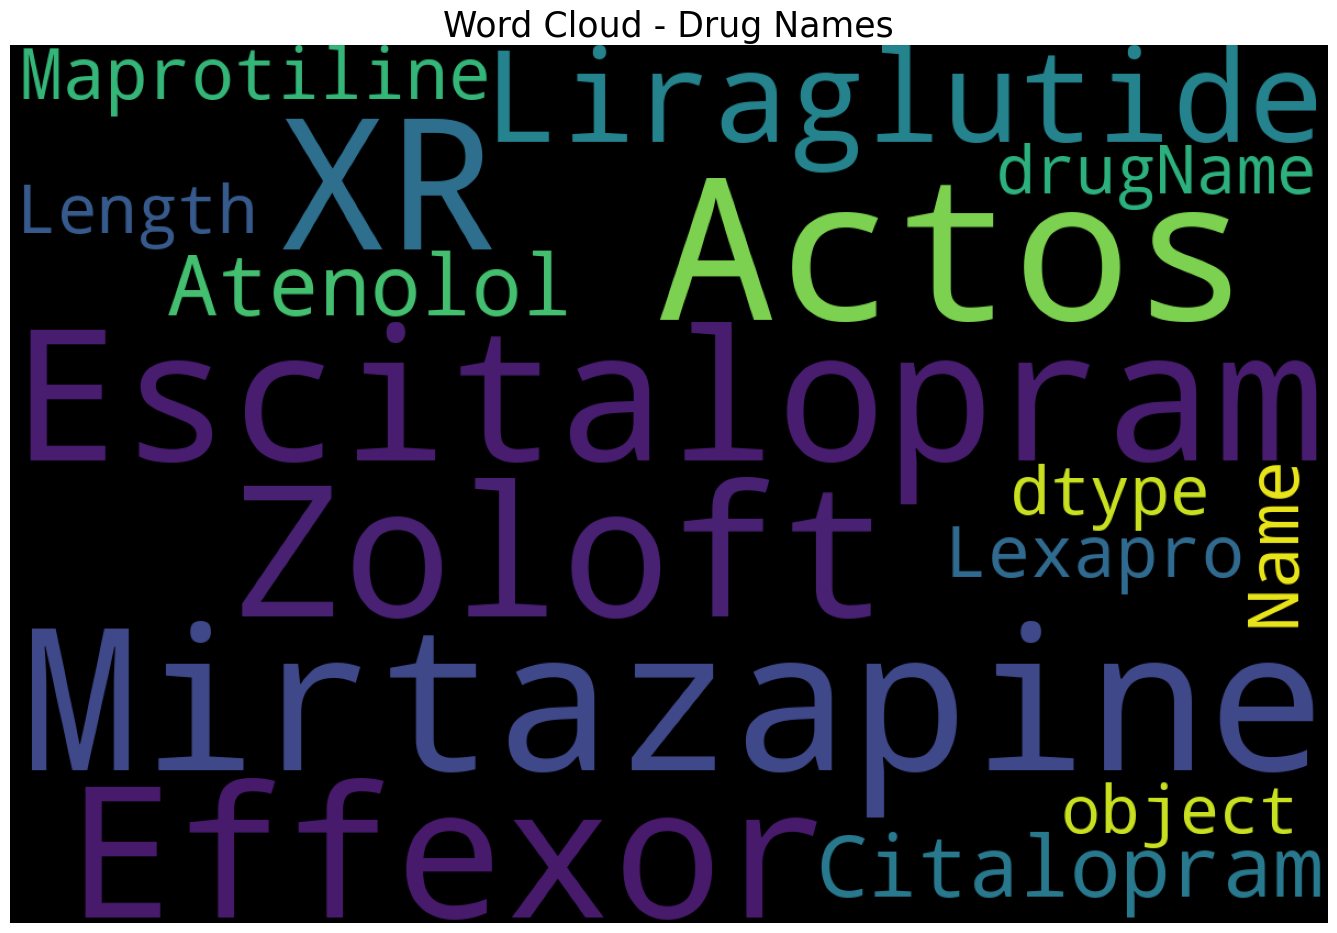

In [15]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(df['drugName']))

plt.rcParams['figure.figsize'] = (17, 17)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

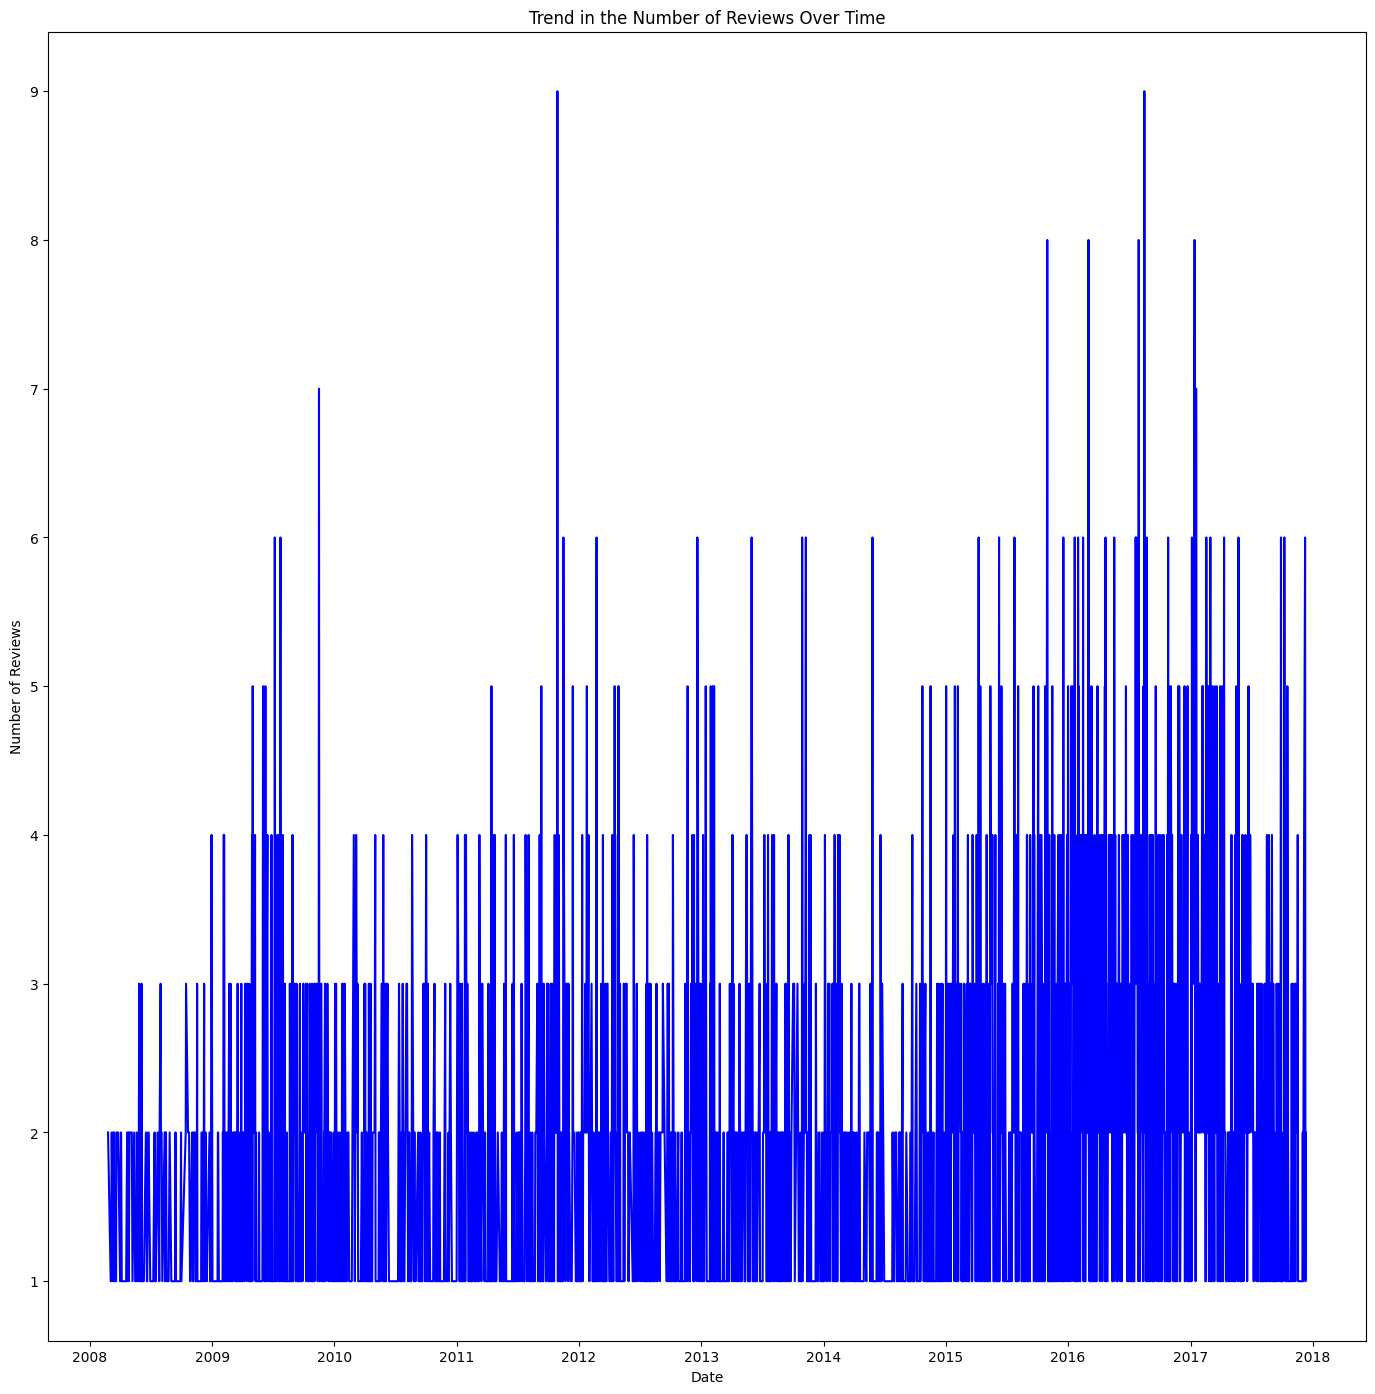

In [16]:
# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by date and count the number of reviews for each date
reviews_per_date = df.groupby(df['date'].dt.date).size().reset_index(name='counts')

# Plot a line chart of the trend in the number of reviews over time
plt.plot(reviews_per_date['date'], reviews_per_date['counts'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Trend in the Number of Reviews Over Time')
plt.show()

## Interpretation:

* 1-Improved Accessibility: There might have been improvements in the accessibility of the drug, either through increased availability or decreased cost, which led to an increase in the number of patients using the drug and writing reviews.

* 2-Increased Use of Online Platforms: The increase in the use of online platforms for reviewing drugs and conditions might have contributed to the increase in the number of reviews from 2015 onwards.

* 3-Changes in Marketing Strategies: The drug manufacturer or the healthcare industry might have changed their marketing strategies to increase the visibility of the drug, which led to an increase in the number of patients using the drug and writing reviews.

## Feature Engineering/ Data Preprocessing:

In [17]:
def clean_review(review):
    # Convert to lowercase
    review = review.lower()

    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the review
    tokens = nltk.word_tokenize(review)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Join the cleaned tokens back together
    cleaned_review = ' '.join(tokens)

    return cleaned_review

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [19]:
df['review'] = df['review'].apply(lambda x: clean_review(x))

* The importance of the date feature depends on the business problem and the type of model being used. In some cases, the date feature may be important in identifying patterns and trends over time. For example, if you are building a time-series model, the date feature would be an important input for the model. However, in other cases, the date feature may not be as relevant. For instance, if you are building a model to predict the rating based on the review, the date feature may not have a significant impact on the model's predictions.

In [20]:
df.drop(['date'],axis=1,inplace=True)

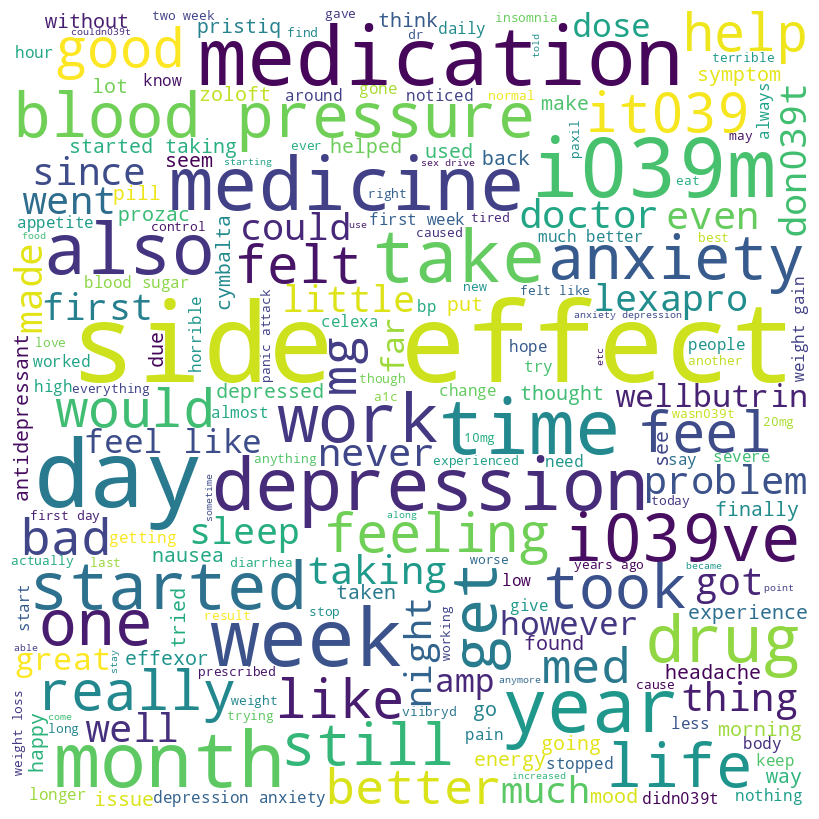

In [21]:
# Get the stopwords as a list
stopwords = list(stopwords.words('english'))

# Join all the reviews into a single string
reviews_text = " ".join(review for review in df.review)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [22]:
df

,drugName,condition,review,rating,usefulCount
0,Mirtazapine,Depression,i039ve tried antidepressants years citalopram ...,10,22
35,Actos,"Diabetes, Type 2",actos almost year gained 24 pounds swelling ha...,4,42
38,Escitalopram,Depression,22 year old female college student wanted writ...,9,32
67,Zoloft,Depression,zoloft help 3 months worked 100mg tired hungry...,1,51
73,Effexor XR,Depression,sadly lasted 5 days effexor xr side effects 75...,1,18
...,...,...,...,...,...
53672,Liraglutide,"Diabetes, Type 2",i039ve using victoza 3 months 16 weeks 18 one ...,10,41
53691,Citalopram,Depression,best medication ever i039m 20 mg important tak...,10,43
53711,Atenolol,High Blood Pressure,49 yr old female taken combination atenololchl...,4,82
53724,Maprotiline,Depression,taking maprotiline 35 years still taking seeme...,9,10


# MODEL BUILDING:

In [23]:
df["rating"] = df["rating"].astype(int)

In [24]:
# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
reviews = vectorizer.fit_transform(df["review"])

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(reviews, df["condition"], test_size=0.25, random_state=42)

## Model-1 Logistic Regression:

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Train the model
model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [28]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.88      0.99      0.93       771
   Diabetes, Type 2       0.98      0.77      0.86       204
High Blood Pressure       0.97      0.70      0.81       197

           accuracy                           0.91      1172
          macro avg       0.94      0.82      0.87      1172
       weighted avg       0.91      0.91      0.90      1172



In [29]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


## Model-2 Random Forest:

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.92      0.99      0.95       771
   Diabetes, Type 2       0.96      0.87      0.91       204
High Blood Pressure       0.95      0.76      0.84       197

           accuracy                           0.93      1172
          macro avg       0.94      0.87      0.90      1172
       weighted avg       0.93      0.93      0.93      1172



In [33]:
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model2.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


## Model-3 Support Vector Machine:

In [34]:
from sklearn.svm import SVC

In [35]:
# Train the model
model3 = SVC()
model3.fit(X_train, y_train)

SVC()

In [36]:
# Evaluate the model
y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.90      0.99      0.94       771
   Diabetes, Type 2       0.99      0.81      0.89       204
High Blood Pressure       0.97      0.75      0.84       197

           accuracy                           0.92      1172
          macro avg       0.95      0.85      0.89      1172
       weighted avg       0.93      0.92      0.92      1172



In [37]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model3.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


## Model-4 Gradient Boosting:

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
# Train the model
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
# Evaluate the model
y_pred = model4.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.89      0.99      0.93       771
   Diabetes, Type 2       0.98      0.77      0.87       204
High Blood Pressure       0.93      0.71      0.81       197

           accuracy                           0.90      1172
          macro avg       0.93      0.82      0.87      1172
       weighted avg       0.91      0.90      0.90      1172



In [41]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model4.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


## Model-5 Decision Tree:

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Train the model
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# Evaluate the model
y_pred = model5.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.93      0.95      0.94       771
   Diabetes, Type 2       0.85      0.87      0.86       204
High Blood Pressure       0.83      0.74      0.78       197

           accuracy                           0.90      1172
          macro avg       0.87      0.85      0.86      1172
       weighted avg       0.90      0.90      0.90      1172



In [45]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model5.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


* Based on accuracy score , I have selected Support Vector Machine as best model among all the models I built.

# Drug Recommendation based on Ratings:

In [46]:
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")["rating"].mean()
recommended_drugs = drug_ratings.nlargest(5).index.tolist()
print("Recommended Drugs based on ratings only:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs based on ratings only:
1 Forfivo XL
2 Imipramine
3 Invega
4 Limbitrol DS
5 Paxil CR


**Project Summary:**

* The project aims to classify patient's condition based on the reviews they provide.
* The data was cleaned by removing stop words and performing normalization, and the date feature was excluded as it was deemed unhelpful for building the model.
* To convert the review text into numerical data, the TF-IDF vectorizer was employed, and several models, including Logistic Regression, Random Forest, SVM, Gradient Boosting, and Decision Tree, were constructed, using the patient's condition as the dependent variable and the review as the independent variable.
* The SVM model was selected as the best model based on the evaluation metrics, which demonstrated its superior accuracy.
* The project also recommended 5 popular drugs based on their ratings; however, it was noted that individual drug effects may vary, and the recommendations should be considered general in nature.

***Conclusion:***

The project successfully predicted patient conditions based on drug reviews, and the insights gained can be used to recommend suitable drugs for patients based on their condition and the experiences of other patients with similar conditions. The project's findings provide valuable information to healthcare providers and patients alike in making informed decisions regarding drug usage.